# Preproc Fussing

In [1]:
#%matplotlib notebook
%matplotlib inline

In [2]:
# imports
from importlib import reload
import os
from matplotlib import pyplot as plt

from astropy.io import fits
from desispec import preproc
# You may wish to comment this out
#from pypeit import ginga

/home/xavier/anaconda3/lib/python3.7/site-packages/desispec-0.29.0.dev3381-py3.7.egg/desispec/maskbits.py:73: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """)


# Init

In [3]:
exp_path = '/home/xavier/DESI/Commissioning/exposures'

In [4]:
night = '20190619'

# Methods

In [5]:
def add_gain(header):
    header['GAINA'] = 1.21763880607
    header['GAINB'] = 1.26599257375
    header['GAINC'] = 1.37207665312
    header['GAIND'] = 1.28793077884

In [6]:
def show_boundary(img, vmin=-400, vmax=1673):
    plt.clf()
    plt.figure(figsize=(13,7))
    plt.imshow(img.pix[1800:2200,500:1000], vmin=vmin, vmax=vmax)
    plt.show()

# Try one (0.5s)

In [7]:
iid = 16322
ifile_05 = os.path.join(exp_path, night, '000{}'.format(iid), 'desi-000{}.fits.fz'.format(iid))
ifile_05

'/home/xavier/DESI/Commissioning/exposures/20190619/00016322/desi-00016322.fits.fz'

In [8]:
hdulist = fits.open(ifile_05)
z2_hdu = hdulist['z2']

### Show it (you may wish to comment this out)

In [9]:
#ginga.show_image(z2_hdu.data)

### Run preproc!

In [10]:
## Add in gain
add_gain(z2_hdu.header)

In [11]:
reload(preproc)
img = preproc.preproc(z2_hdu.data, z2_hdu.header, None, bias=False, pixflat=False, mask=False, 
                      nocrosstalk=True, ccd_calibration_filename=False, dark=False, overscan_per_row=True)

INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier A of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.064272 2006.687500
INFO:preproc.py:517:preproc: Measured readnoise for AMP A = 2.064272
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier B of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.097935 2007.593750
INFO:preproc.py:517:preproc: Measured readnoise for AMP B = 2.097935
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier C of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.620456 2009.734375
INFO:preproc.py:517:preproc: Measured readnoise for AMP C = 2.620456
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier D of camera z2


### View it

<Figure size 432x288 with 0 Axes>

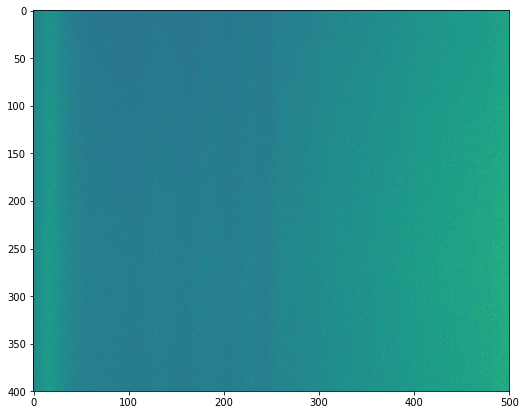

In [12]:
#ginga.show_image(img.pix)
show_boundary(img)

## Original

In [13]:
reload(preproc)
img_orig = preproc.preproc(z2_hdu.data, z2_hdu.header, None, bias=False, pixflat=False, mask=False, 
                      nocrosstalk=True, ccd_calibration_filename=False, dark=False, orig_over=True,
                          overscan_per_row=True)

INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier A of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.064272 2006.687500
INFO:preproc.py:517:preproc: Measured readnoise for AMP A = 2.064272
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier B of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.097935 2007.593750
INFO:preproc.py:517:preproc: Measured readnoise for AMP B = 2.097935
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier C of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.620456 2009.734375
INFO:preproc.py:517:preproc: Measured readnoise for AMP C = 2.620456
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier D of camera z2


<Figure size 432x288 with 0 Axes>

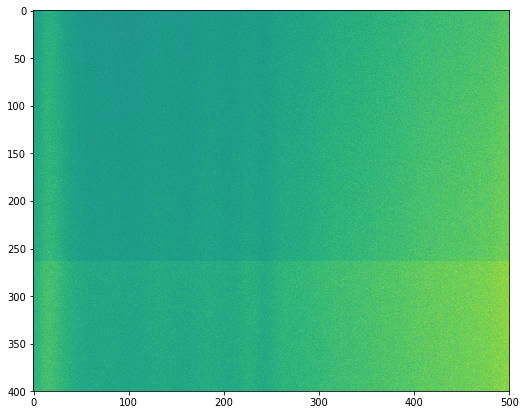

In [14]:
show_boundary(img_orig)

# Long exposure (10s)

In [15]:
iid = 16287
ifile = os.path.join(exp_path, night, '000{}'.format(iid), 'desi-000{}.fits.fz'.format(iid))
ifile

'/home/xavier/DESI/Commissioning/exposures/20190619/00016287/desi-00016287.fits.fz'

In [16]:
hdulist = fits.open(ifile)
z2_hdu_10 = hdulist['z2']

In [17]:
## Add in gain
add_gain(z2_hdu_10.header)

In [18]:
reload(preproc)
img_10 = preproc.preproc(z2_hdu_10.data, z2_hdu.header, None, bias=False, pixflat=False, mask=False, 
                      nocrosstalk=True, ccd_calibration_filename=False, dark=False, overscan_per_row=True)

INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier A of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.088590 2006.609375
INFO:preproc.py:517:preproc: Measured readnoise for AMP A = 2.088590
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier B of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.126005 2007.546875
INFO:preproc.py:517:preproc: Measured readnoise for AMP B = 2.126005
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier C of camera z2
INFO:preproc.py:483:preproc: Median rdnoise and overscan= 2.927955 2009.625000
INFO:preproc.py:517:preproc: Measured readnoise for AMP C = 2.927955
INFO:preproc.py:461:preproc: nrows in overscan=2064
INFO:preproc.py:465:preproc: Subtracting overscan per row for amplifier D of camera z2


<Figure size 432x288 with 0 Axes>

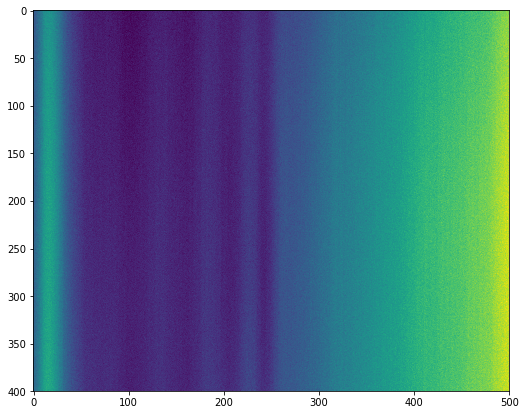

In [19]:
show_boundary(img_10, vmin=None, vmax=None)